<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/wandb-log/Saving_Code_with_W&B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{save-code} -->

<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />


<!--- @wandbcode{save-code} -->

# 👩🏽‍💻 Never Lose Track of What Code You Ran Ever Again

It happens to the best of us:
chasing down a good idea for your model,
you run the Jupyter cells out of order
or you forget to commit while trying several different models.
The code is unrecoverable, but the accuracy
was higher than anything you've seen!
**A really cool result has been severed
from the code used to generate it**,
and it might as well have been told
to you by [Mr. Snuffleupagus](https://muppet.fandom.com/wiki/Mr._Snuffleupagus)
or [The Great Gazoo](https://en.wikipedia.org/wiki/The_Great_Gazoo).

With Weights & Biases, you **won't need to worry** about that happening again!
We'll **save the code you ran along with results and hyperparameters**, all in a centralized location with easy comparison and visualization tools.
Even better, in a Jupyter notebbok this feature **tracks all the cells you executed!**

Here is a simple implementation where we simulate logging some metrics and the code that generates them -- the same procedure works for both notebooks and Python scripts.

_Note_: We don't train any models here 😔. If you'd like to see how W&B integrates with other tools, check out
one of our integration demo
[colabs](https://github.com/wandb/examples/tree/master/colabs)
or [videos](https://www.youtube.com/playlist?list=PLD80i8An1OEGajeVo15ohAQYF1Ttle0lk).


# 🚀 Installs and Imports

In [ ]:
%%capture
!pip install -q wandb

In [ ]:
import wandb
import math
import random

# 🙅‍♂️ Logging without Saving Code

First, let's review how W&B logging works without code saving.

We need to `init`ialize a `run`, a unit of computation
(model training, data preprocessing, etc.)
in our `project`.
That's also where we set up the `config`uration of the `run`,
e.g. hyperparameters like learning rate.

Note here we specify the argument `save_code` as `False`, to specifically say that we do not need to save the code for the run.

Then, we'll wrap our training `for` loop in a `with` block,
ensuring our run closes out when training finishes,
and `log` our metrics.

In [ ]:
run = wandb.init(project="code_save",
                 config={"hyperparameter": 4},
                 save_code=False)

with run:
    for step in range(100):
        # insert training process here
        wandb.log({
            "acc": math.log(0.1 + random.random() + step * 0.01),
            "val_acc": math.log(0.1 + random.random() + step * 0.01),
            "loss": wandb.config.hyperparameter - math.log(0.1 + random.random() + step * 0.01),
            "val_loss":  wandb.config.hyperparameter - math.log(0.1 + random.random() + step * 0.01)})

## 📊 Dashboard Screenshot

Here is an example of what the dashboard looks like
after running the snippet above.

Metrics and hyperparameters are logged, but not the code!

![Without Code](https://i.ibb.co/DDx029z/Without-Code.png)


# 💾 Logging Metrics and Saving Code

Adding code saving is easy: we just pass the argument
`save_code=True` to `wandb.init`. That's it!

_Hot Tip_: If you don't want to worry about setting this on every project,
just change your default on the [settings page](https://wandb.ai/settings), as below:

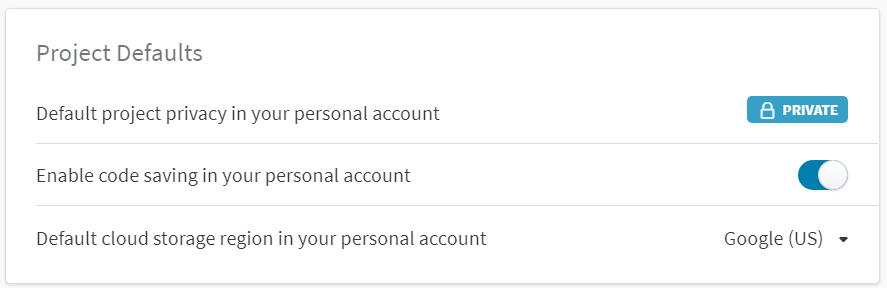

In [ ]:
run = wandb.init(project="code_save",
                 config={"hyperparameter": 4},
                 save_code=True)

with run:
    for step in range(100):
        # insert training process here
        wandb.log({
            "acc": math.log(0.1 + random.random() + step * 0.01),
            "val_acc": math.log(0.1 + random.random() + step * 0.01),
            "loss": wandb.config.hyperparameter - math.log(0.1 + random.random() + step * 0.01),
            "val_loss":  wandb.config.hyperparameter - math.log(0.1 + random.random() + step * 0.01)})

## 📊 Dashboard Screenshot
In the left-hand panel on the dashboard, we can see a new icon pop up: `{}`.


![Code](https://i.ibb.co/3084138/code.png)


If you click it, you'll see the entire history of the notebook session! That includes the code we ran for the section without code logging.

W&B also automatically catches the standard out and standard error,
plus system metrics!



![With Code](https://i.ibb.co/vhy6hZg/With-Code.png)

# 👨🏿‍🏫 Learn more about W&B
That's not all!
Check out the links below to learn how to use W&B to ...
- [log rich media like audio, video, and 3D point clouds](http://wandb.me/media-colab)
- [visualize datasets and model predictions](http://wandb.me/dsviz-nature-colab)
- [coordinate hyperparameter sweeps](http://wandb.me/sweeps-colab)

...or check out our
[repository of examples](https://github.com/wandb/examples)
for even more features!